# STAT 201 Group Proposal Group 27
___________________________________________

### Title: Are students performing better with a partner?

## Introduction:

Our project aims to research on whether student's academic performance in a university are affected if they are on a relationship with a partner. The dataset consists of 145 students which shows their individual GPA, relationship status, number of siblings, weekly study hours, parents' marital status and other factors. 

### Preliminary Results


In [2]:
# Libraries required for the proposal
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse) 
library(tidymodels)
library(datasets)
library(rvest)
library(tibble) 
library(httr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ recipes      1.0.8     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr:

In [3]:
student_gpa <- read_csv('https://raw.githubusercontent.com/anjx123/stats201-group-project/Dataset-Refactor/student_prediction.csv')
head(student_gpa) # First 6 data

Rows: 145 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): STUDENTID
dbl (32): AGE, GENDER, HS_TYPE, SCHOLARSHIP, WORK, ACTIVITY, PARTNER, SALARY...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,⋯,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,2,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


                                                Figure 1

Figure 1 shows the first 6 data obtained from the dataset which contained the different variables such as prepartion for study and the number of hours spent on studying. For the project, we are only interested if students who has a partner and without a partner will affect their GPA. 

The code as shown below shows the data wrangling of the dataset that is required for the project and counts the number of students who has or do not have a partner among the 145 students that were in the dataset.

In [3]:
student_gpa |> summarize(PartnerCount = sum(PARTNER == 1),     # With partner 
                       NoPartnerCount = sum(PARTNER == 2))     # Without partner

PartnerCount,NoPartnerCount
<int>,<int>
61,84


                    Figure 2

### Data wrangling

Figure 2 shows a person has a partner or not is represented by 1- for Yes and 2- for No. We tidy this up so that it is much more clear to read and understand. In the process, we select the two columns that we are interested in, whether an individual has a partner, and their cumulative GPA.
We can then group these students by whether they have a partner or not, and calculate the sample mean of their cumulative GPA.


In [4]:
partner_data <- student_gpa |> select(STUDENTID, PARTNER, CUML_GPA) |> mutate(PARTNER = recode(PARTNER, '1' = "Yes", '2' = "No"))
head(partner_data)

STUDENTID,PARTNER,CUML_GPA
<chr>,<chr>,<dbl>
STUDENT1,No,1
STUDENT2,No,2
STUDENT3,No,2
STUDENT4,Yes,3
STUDENT5,Yes,2
STUDENT6,No,4


In [5]:
mean_gpas <- partner_data |> group_by(PARTNER) |> summarize(GPA = mean(CUML_GPA))
head(mean_gpas)


PARTNER,GPA
<chr>,<dbl>
No,3.059524
Yes,3.213115


### Visualization

In order to compare the student performance with the factor PARNTER, we visualize the distribution of cumulative GPA separately, for student with Partner and without Partner. We compare the sample distribution of Students' GPA, finding if there have difference in school performance.

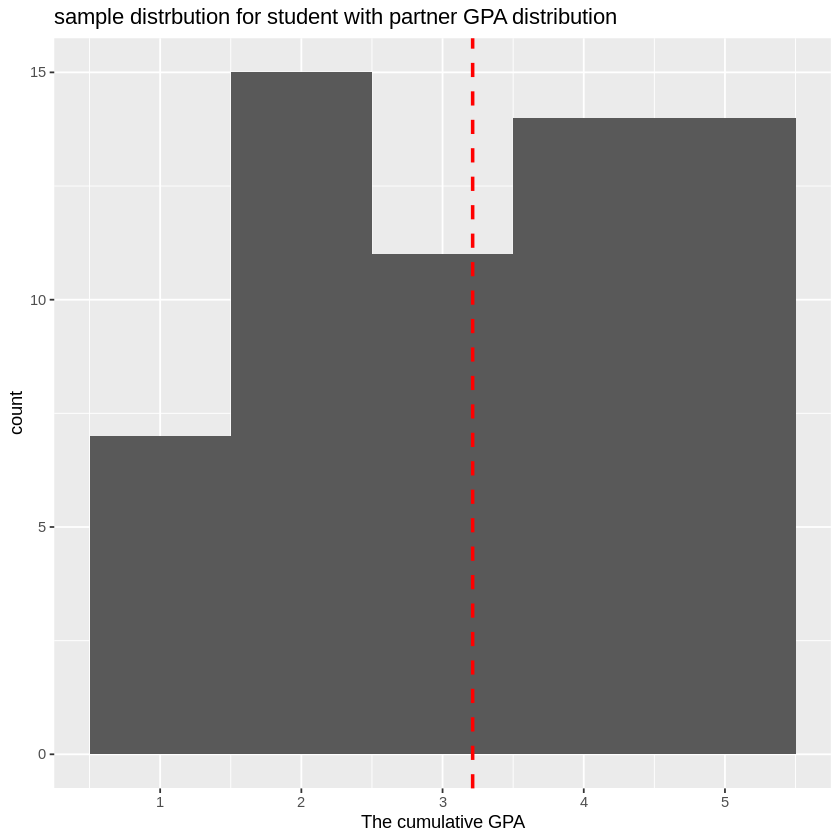

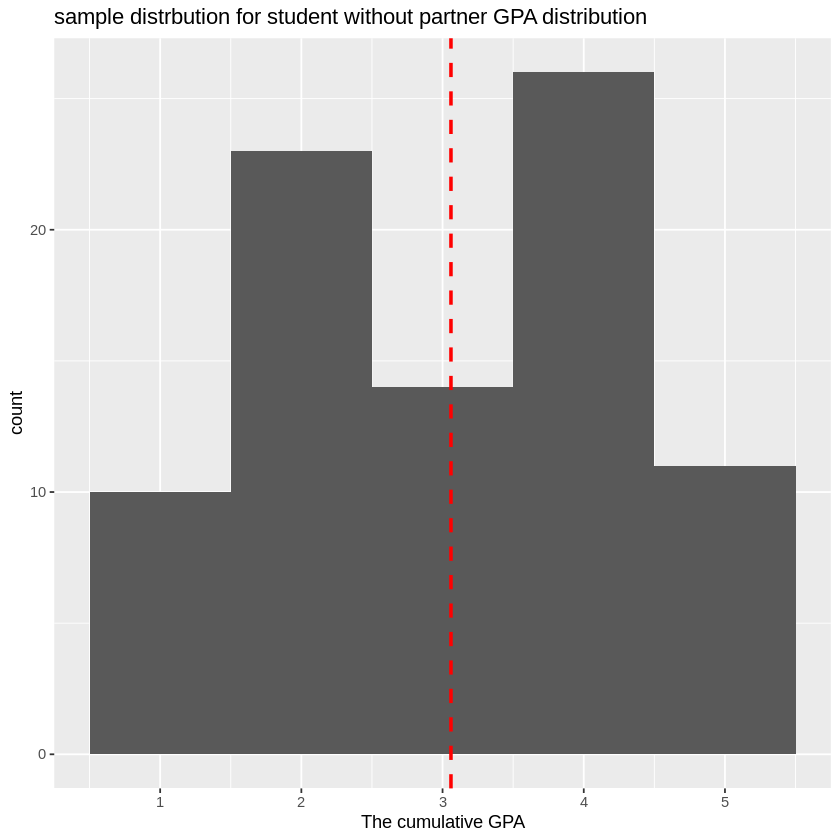

In [22]:
partner_stu_gpa_plot <- partner_data |>
filter(PARTNER == "Yes")|>
ggplot(aes(x = CUML_GPA))+
geom_histogram(binwidth = 1) +
geom_vline(aes(xintercept = 3.213115), color = "red", linetype = "dashed", size = 1) +
ggtitle("sample distrbution for student with partner GPA distribution")+
xlab("The cumulative GPA")
partner_stu_gpa_plot

no_partner_stu_gpa_plot <- partner_data |>
filter(PARTNER == "No")|>
ggplot(aes(x = CUML_GPA))+
geom_histogram(binwidth = 1) +
geom_vline(aes(xintercept = 3.059524), color = "red", linetype = "dashed", size = 1)+
ggtitle("sample distrbution for student without partner GPA distribution")+
xlab("The cumulative GPA")

no_partner_stu_gpa_plot

### Methods: Plan
From wrangling the data, we can conclude that students who are on a relationship tend to obtain a higher GPA, as compared to students without partner. We intend to conduct a bootstrap sample in the final project to infer and conclude the hypothesis that students who are on relationship tend to outperform students who are not on relationship. The data is being analyse through a histogram as shown in Figure 4.

### References
1. Highher Education Student Performance: https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation